In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import numpy.random as npr
import theano
from theano import tensor as T
import pickle as pk
import re
from copy import deepcopy
import sys
import simplejson

# image processing
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2hsv, hsv2rgb

import lasagne
from lasagne.layers import Pool2DLayer, Conv2DLayer, dropout, \
    DenseLayer, InputLayer, get_output, get_all_params
from lasagne import nonlinearities
from lasagne import layers
    
import bnr_ml.objectdetect.yolo as yolo
from bnr_ml.objectdetect import utils

import pdb

In [117]:
def create_dummy_dataset(N=10000, image_size=(100,100), min_size=15, max_size=50, max_obj_num=3):
    x_idx, y_idx = np.meshgrid(np.arange(image_size[1]), np.arange(image_size[0]))
    ims = []
    for n in range(N):
        num_obj = np.int_(1 + max_obj_num * npr.rand())
        new_image = np.ones(image_size + (3,))
        
        for i in range(num_obj):
            if npr.rand() < .5: # make square
                side_length = np.int_(min_size + (max_size - min_size) * npr.rand())
                x_pos = np.int_(image_size[1] - side_length) * npr.rand()
                y_pos = np.int_(image_size[0] - side_length) * npr.rand()
                idx1 = np.bitwise_and(
                    np.bitwise_and(
                        np.bitwise_and(x_idx >= x_pos, y_idx >= y_pos),
                            x_idx < x_pos + side_length), 
                    y_idx < y_pos + side_length
                )
                idx2 = np.bitwise_and(
                    np.bitwise_and(
                        np.bitwise_and(x_idx == x_pos, y_idx == y_pos),
                            x_idx == x_pos + side_length), 
                    y_idx == y_pos + side_length
                )
                idx1 = idx1.reshape(image_size + (1,))
                idx2 = idx2.reshape(image_size + (1,))
                idx1 = np.repeat(idx1, 3, axis=2)
                idx2 = np.repeat(idx2, 3, axis=2)
                idx1[:,:,1:] = False
                new_image[idx1] = 0.
                new_image[idx2] = 0.
            else:
                diam = min_size + (max_size - min_size) * npr.rand()
                x_pos = (image_size[1] - diam) * npr.rand()
                y_pos = (image_size[0] - diam) * npr.rand()
                idx = (x_idx - x_pos)**2 + (y_idx - y_pos)**2 < (diam/2)**2
                idx = idx.reshape(image_size + (1,))
                idx = np.repeat(idx, 3, axis=2)
                idx[:,:,:2] = False
                new_image[idx] = 0.
        ims.append(new_image)
    return ims

In [122]:
tmp = create_dummy_dataset(N=100)

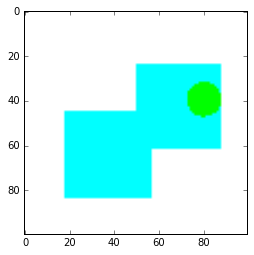

In [123]:
plt.imshow(tmp[np.int_(100 * npr.rand())])